In [1]:
# import libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

# PCA scatterplot
import plotly.express as px
from sklearn.decomposition import PCA

#import MinMaxScaler for Normalization
from sklearn.preprocessing import MinMaxScaler

# import data

In [3]:
# load geo data
nyc_geo_dataframe = pd.read_csv("nyc_data.csv")

In [4]:
#will we just cluster on this or take out a few things

In [5]:
nyc_geo_dataframe

,name,longitude,latitude,uber_count,avg_price,adj_pop,median_daily_test_rate,avg_test_score
0,Allerton,-73.859319,40.865788,860.0,1.50,28707.0,511.5,27.259983
1,Annadale,-74.178549,40.538114,11.0,1.75,27073.0,263.7,45.011856
2,Arden Heights,-74.185887,40.549286,10.0,1.70,25117.0,482.5,44.121985
3,Arlington,-74.165104,40.635325,0.0,1.55,29715.0,482.5,38.728529
4,Arrochar,-74.067124,40.596313,145.0,1.75,15659.0,317.3,48.440916
...,...,...,...,...,...,...,...,...
297,Woodhaven,-73.858110,40.689887,2058.0,1.40,55411.0,222.2,40.725764
298,Woodlawn,-73.867315,40.898273,810.0,1.40,43034.0,260.1,45.936409
299,Woodrow,-74.205246,40.541968,5.0,1.75,19829.0,297.5,44.273276
300,Woodside,-73.901842,40.746349,4567.0,1.40,44473.0,243.9,46.964018


In [6]:
#leaves out longitude and latitude
nyc_geo_dataframe_features_only = nyc_geo_dataframe[['uber_count','avg_price','adj_pop','median_daily_test_rate','avg_test_score']]

## Set Up Function to Graph Data

In [7]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()
    

In [158]:
# create an object
ac = AgglomerativeClustering(affinity='manhattan',
                             linkage='complete',
                             n_clusters = 4)

## Fit and predict the data:


In [159]:
# fit and predict
y_hc = ac.fit_predict(normalized_df2)

In [160]:
y_hc

array([2, 3, 3, 3, 3, 3, 0, 3, 3, 2, 3, 0, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3,
       3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2, 2, 0,
       3, 2, 3, 0, 3, 1, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3,
       2, 3, 0, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3,
       2, 2, 3, 3, 3, 2, 3, 1, 0, 0, 2, 3, 2, 2, 0, 3, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3,
       3, 3, 3, 0, 3, 0, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 1, 3, 1,
       3, 2, 0, 3, 2, 2, 3, 2, 0, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 1, 3,
       2, 3, 0, 2, 2, 2, 3, 2, 2, 2, 0, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       3, 3, 2, 2, 3, 2, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2,
       3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3,
       2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3,
       2, 3, 2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 2, 1, 0, 3, 3, 3, 2, 2, 2,
       3, 3, 0, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2,

In [161]:
np.unique(y_hc)

array([0, 1, 2, 3])

In [162]:
y_hc_df = pd.DataFrame(y_hc)

In [163]:
y_hc_df

,0
0,2
1,3
2,3
3,3
4,3
...,...
297,2
298,2
299,3
300,2


## Find the right number of clusters using a Dendrogram

before, in the centriod/kmeans learning we started with identifying the number of groups, and then deciding who goes into which groups. I guess the above illustration was just to show that the data we are working with is the same type as before? Because below we will be identifying who goes into which group and how at the same time. we can look at the graph and decide at which level would we get the most value of grouping. I think it's also cool to see the sub groups rolling up into this level.

In [110]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='complete'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

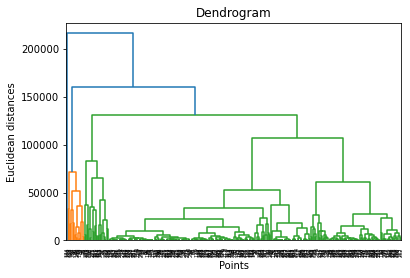

In [111]:
# Plot dendrogram
plot_dendrogram(nyc_geo_dataframe_features_only)

# Optional: Normalize Data

In [114]:
#normalize
scaler = MinMaxScaler()
normalized_df1 = scaler.fit_transform(nyc_geo_dataframe_features_only)
normalized_df1


array([[4.26096952e-03, 3.88888889e-01, 1.80149481e-01, 1.12784609e-01,
        2.26247536e-01],
       [5.45007729e-05, 6.66666667e-01, 1.69895388e-01, 3.98893922e-02,
        4.80298979e-01],
       [4.95461572e-05, 6.11111111e-01, 1.57620599e-01, 1.04253692e-01,
        4.67563822e-01],
       ...,
       [2.47730786e-05, 6.66666667e-01, 1.24435993e-01, 4.98323234e-02,
        4.69728978e-01],
       [2.26277300e-02, 2.77777778e-01, 2.79088302e-01, 3.40648350e-02,
        5.08236863e-01],
       [2.31970153e-01, 7.22222222e-01, 4.85437807e-01, 2.35394481e-01,
        4.51739222e-01]])

In [115]:
#make interpretable df
normalized_df2 = pd.DataFrame(data=normalized_df1, columns=['uber_count','avg_price','adj_pop','median_daily_test_rate','avg_test_score'])
normalized_df2

,uber_count,avg_price,adj_pop,median_daily_test_rate,avg_test_score
0,0.004261,0.388889,0.180149,0.112785,0.226248
1,0.000055,0.666667,0.169895,0.039889,0.480299
2,0.000050,0.611111,0.157621,0.104254,0.467564
3,0.000000,0.444444,0.186475,0.104254,0.390377
4,0.000718,0.666667,0.098267,0.055657,0.529373
...,...,...,...,...,...
297,0.010197,0.277778,0.347729,0.027681,0.418960
298,0.004013,0.277778,0.270058,0.038830,0.493530
299,0.000025,0.666667,0.124436,0.049832,0.469729
300,0.022628,0.277778,0.279088,0.034065,0.508237


# PCA scatterplot for this clustering

In [164]:
n_components = 2 #from above

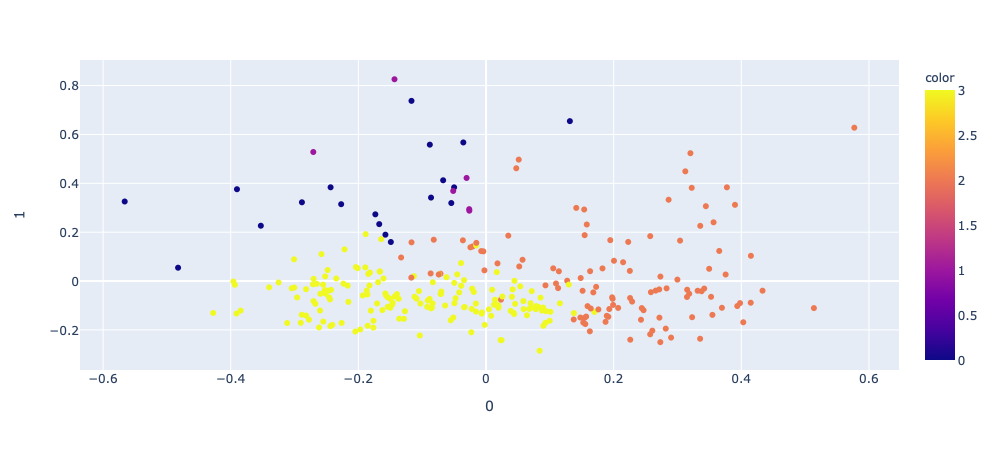

In [165]:
pca = PCA(n_components = n_components)
components = pca.fit_transform(normalized_df2)
# Plotting the PCA scatter plot for different classes

fig = px.scatter(components, x=0, y=1, color=y_hc_df[0]) #check if column name is correct
fig.show()